<a href="https://colab.research.google.com/github/atorresf/Proyecto_Python/blob/main/proyecto_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET DE QUEJAS QUE REPORTA PROFECO DEL AÑO 2022**

Se escogió analizar este tema después de realizar una queja en PREFECO me surgió la inquietud de saber más sobre la cantidad y motivos principales que la gente tiene para realizar quejas, así como saber que sectores son los que más quejas tienen y si son resueltas o no.

Se obtuvo el dataset de la página del gobierno 

https://datos.profeco.gob.mx/datos_abiertos/

El dataset se dividió en 2 y se agrega la parte de quejas de telecomunicaciones, por lo que son 3 archivos que se concatenan en un df con el cual se trabaja.

Se cargan las librerias necesarias para la ejecución del script y la primera parte se realiza la limpieza del dataset

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
#Función para evitar error al hacer la importación de archivo
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

In [221]:
#hacer lista con los datos
archivos = [
      'https://raw.githubusercontent.com/atorresf/datasets/main/DATOS_PROFECO_2022_01.csv',
      'https://raw.githubusercontent.com/atorresf/datasets/main/DATOS_PROFECO_2022_02.csv',
      'https://raw.githubusercontent.com/atorresf/datasets/main/DATOS_TELECOMUN_2022.csv'
]

#cargar los datos en df
df1 = pd.read_csv(archivos[0], converters={'TIPO_RECLAMACION': convert_dtype,'MOTIVO_RECLAMACION': convert_dtype})
df2 = pd.read_csv(archivos[1], converters={'TIPO_RECLAMACION': convert_dtype,'MOTIVO_RECLAMACION': convert_dtype})
df3 = pd.read_csv(archivos[2], converters={'TIPO_RECLAMACION': convert_dtype,'MOTIVO_RECLAMACION': convert_dtype})


In [185]:
df1.dtypes

ID_EXP                  object
FECHA_INGRESO           object
FECHA DE CIERRE         object
TIPO_CONCILIACION       object
ESTADO_PROCESAL         object
PROVEEDOR               object
NOMBRE_COMERCIAL        object
GIRO                    object
SECTOR                  object
ODECO                   object
ESTADO_UA               object
TIPO_RECLAMACION        object
MOTIVO_RECLAMACION      object
COSTO BIEN SERVICIO     object
MONTO RECLAMADO         object
MONTO RECUPERADO        object
PROCEDIMIENTO           object
BIEN O SERV             object
MEDIO INGRESO           object
TIPO PROD               object
MODALIDAD COMPRA        object
MODALIDAD PAGO          object
PROB ESPECIAL           object
Unnamed: 23            float64
Unnamed: 24            float64
dtype: object

In [186]:
df2.dtypes

ID_EXP                  object
FECHA_INGRESO           object
FECHA DE CIERRE         object
TIPO_CONCILIACION       object
ESTADO_PROCESAL         object
PROVEEDOR               object
NOMBRE_COMERCIAL        object
GIRO                    object
SECTOR                  object
ODECO                   object
ESTADO_UA               object
TIPO_RECLAMACION        object
MOTIVO_RECLAMACION      object
COSTO BIEN SERVICIO     object
MONTO RECLAMADO         object
MONTO RECUPERADO        object
PROCEDIMIENTO           object
BIEN O SERV             object
MEDIO INGRESO           object
TIPO PROD               object
MODALIDAD COMPRA        object
MODALIDAD PAGO          object
PROB ESPECIAL           object
Unnamed: 23            float64
Unnamed: 24            float64
dtype: object

In [187]:
df3.dtypes

EXPEDIENTE               object
FECHA DE INGRESO         object
FECHA DE CIERRE          object
TIPO DE CONCILIACIÓN     object
ESTADO PROCESAL          object
PROVEEDOR                object
NOMBRE COMERCIAL         object
GIRO                     object
SECTOR                   object
ODECO                    object
ESTADO                   object
TIPO DE RECLAMACIÓN      object
MOTIVO DE RECLAMACIÓN    object
COSTO BIEN O SERVICIO    object
MONTO RECLAMADO          object
MONTO RECUPERADO         object
PROCEDIMIENTO            object
BIEN O SERVICIO          object
MEDIO DE INGRESO         object
TIPO PRODUCTO            object
MODALIDAD DE COMPRA      object
MODALIDAD PAGO           object
PROBLEMA ESPECIAL        object
dtype: object

In [222]:
#homologar nombres de columnas en cada df
nuevos_nombres = { 
    'ID_EXP':'ID_EXP', 
    'FECHA_INGRESO':'FECHA_INGRESO', 
    'FECHA DE CIERRE':'FECHA_CIERRE', 
    'TIPO_CONCILIACION':'TIPO_CONCILIACION',
    'ESTADO_PROCESAL':'ESTADO_PROCESAL', 
    'PROVEEDOR':'PROVEEDOR', 
    'NOMBRE_COMERCIAL':'NOMBRE_COMERCIAL', 
    'GIRO':'GIRO', 
    'SECTOR':'SECTOR',
    'ODECO':'ODECO', 
    'ESTADO_UA':'ESTADO', 
    'TIPO_RECLAMACION':'TIPO_RECLAMACION', 
    'MOTIVO_RECLAMACION':'MOTIVO_RECLAMACION',
    'COSTO BIEN SERVICIO':'COSTO_BIEN_SERVICIO', 
    'MONTO RECLAMADO':'MONTO_RECLAMADO', 
    'MONTO RECUPERADO':'MONTO_RECUPERADO',
    'PROCEDIMIENTO':'PROCEDIMIENTO', 
    'BIEN O SERV':'BIEN_O_SERVICIO', 
    'MEDIO INGRESO':'MEDIO_INGRESO', 
    'TIPO PROD':'TIPO_PRODUCTO',
    'MODALIDAD COMPRA':'MODALIDAD_COMPRA',
    'MODALIDAD PAGO':'MODALIDAD_PAGO',
    'PROB ESPECIAL':'PROBLEMA_ESPECIAL', 
    'Unnamed: 23':'Unnamed_23',
    'Unnamed: 24':'Unnamed_24'
}

nuevos_nombres2 = { 
'EXPEDIENTE':'ID_EXP',
'FECHA DE INGRESO':'FECHA_INGRESO',
'FECHA DE CIERRE':'FECHA_CIERRE', 
'TIPO DE CONCILIACIÓN':'TIPO_CONCILIACION',
'ESTADO PROCESAL':'ESTADO_PROCESAL',
'PROVEEDOR':'PROVEEDOR', 
'NOMBRE COMERCIAL':'NOMBRE_COMERCIAL', 
'GIRO':'GIRO', 
'SECTOR':'SECTOR',
'ODECO':'ODECO',
'ESTADO':'ESTADO',
'TIPO DE RECLAMACIÓN':'TIPO_RECLAMACION', 
'MOTIVO DE RECLAMACIÓN':'MOTIVO_RECLAMACION',
'COSTO BIEN O SERVICIO':'COSTO_BIEN_SERVICIO', 
'MONTO RECLAMADO':'MONTO_RECLAMADO',
'MONTO RECUPERADO':'MONTO_RECUPERADO',
'PROCEDIMIENTO':'PROCEDIMIENTO',
'BIEN O SERVICIO':'BIEN_O_SERVICIO',
'MEDIO DE INGRESO':'MEDIO_INGRESO', 
'TIPO PRODUCTO':'TIPO_PRODUCTO',
'MODALIDAD DE COMPRA':'MODALIDAD_COMPRA',
'MODALIDAD PAGO':'MODALIDAD_PAGO',
'PROBLEMA ESPECIAL':'PROBLEMA_ESPECIAL'
}

df1.rename(columns=nuevos_nombres, inplace=True)
df2.rename(columns=nuevos_nombres, inplace=True)
df3.rename(columns=nuevos_nombres2, inplace=True)

In [224]:
#Concatenando los 3 archivos en un solo df
df = pd.concat([df1, df2, df3])


In [225]:
# Revisando que el df final tenga las mismas columnas 
df.dtypes

ID_EXP                  object
FECHA_INGRESO           object
FECHA_CIERRE            object
TIPO_CONCILIACION       object
ESTADO_PROCESAL         object
PROVEEDOR               object
NOMBRE_COMERCIAL        object
GIRO                    object
SECTOR                  object
ODECO                   object
ESTADO                  object
TIPO_RECLAMACION        object
MOTIVO_RECLAMACION      object
COSTO_BIEN_SERVICIO     object
MONTO_RECLAMADO         object
MONTO_RECUPERADO        object
PROCEDIMIENTO           object
BIEN_O_SERVICIO         object
MEDIO_INGRESO           object
TIPO_PRODUCTO           object
MODALIDAD_COMPRA        object
MODALIDAD_PAGO          object
PROBLEMA_ESPECIAL       object
Unnamed_23             float64
Unnamed_24             float64
dtype: object

In [226]:
df.shape

(91777, 25)

In [227]:
#Haciendo limpieza del df final, quitándo columnas que no necesitamos
df.drop(["Unnamed_23", "Unnamed_24",'ODECO','ID_EXP'], axis=1, inplace=True)

In [194]:
df.shape

(91777, 21)

In [228]:
#quitando núlos y registros con carácteres raros
guiones = ['BIEN_O_SERVICIO','MODALIDAD_PAGO','TIPO_CONCILIACION','ESTADO_PROCESAL','GIRO','TIPO_RECLAMACION','PROCEDIMIENTO','MEDIO_INGRESO','TIPO_PRODUCTO','MONTO_RECUPERADO']
ceros = ['PROVEEDOR','NOMBRE_COMERCIAL','GIRO','TIPO_RECLAMACION']
ND = ['TIPO_CONCILIACION','ESTADO_PROCESAL']

for guion in guiones:
  df = df[df[guion] != '-']

for cero in ceros:
  df = df[df[guion] != '0']

for nd in ND:
  df = df[df[nd] != '#N/D']

vacios = ['ESTADO','BIEN_O_SERVICIO','MODALIDAD_PAGO','TIPO_RECLAMACION','MOTIVO_RECLAMACION','MEDIO_INGRESO','TIPO_PRODUCTO']

df = df.dropna(subset=vacios)



In [229]:
#quitamos el caracter '$' y ',' de las columnas de costos

df["COSTO_BIEN_SERVICIO"] = df["COSTO_BIEN_SERVICIO"].str.replace("$", "", regex=False)
df["MONTO_RECLAMADO"] = df["MONTO_RECLAMADO"].str.replace("$", "", regex=False)
df["MONTO_RECUPERADO"] = df["MONTO_RECUPERADO"].str.replace("$", "", regex=False)

df["COSTO_BIEN_SERVICIO"] = df["COSTO_BIEN_SERVICIO"].str.replace(",", "", regex=False)
df["MONTO_RECLAMADO"] = df["MONTO_RECLAMADO"].str.replace(",", "", regex=False)
df["MONTO_RECUPERADO"] = df["MONTO_RECUPERADO"].str.replace(",", "", regex=False)

df["MONTO_RECUPERADO"] = df["MONTO_RECUPERADO"].str.replace("-", "0", regex=False)

In [197]:
df.shape

(82790, 21)

In [230]:
df.dtypes

FECHA_INGRESO          object
FECHA_CIERRE           object
TIPO_CONCILIACION      object
ESTADO_PROCESAL        object
PROVEEDOR              object
NOMBRE_COMERCIAL       object
GIRO                   object
SECTOR                 object
ESTADO                 object
TIPO_RECLAMACION       object
MOTIVO_RECLAMACION     object
COSTO_BIEN_SERVICIO    object
MONTO_RECLAMADO        object
MONTO_RECUPERADO       object
PROCEDIMIENTO          object
BIEN_O_SERVICIO        object
MEDIO_INGRESO          object
TIPO_PRODUCTO          object
MODALIDAD_COMPRA       object
MODALIDAD_PAGO         object
PROBLEMA_ESPECIAL      object
dtype: object

In [231]:
#Convertir columnas a tipo de dato float y date

df["COSTO_BIEN_SERVICIO"] = df["COSTO_BIEN_SERVICIO"].astype(float)
df["MONTO_RECLAMADO"] = df["MONTO_RECLAMADO"].astype(float)
df["MONTO_RECUPERADO"] = df["MONTO_RECUPERADO"].astype(float)
df["FECHA_INGRESO"] = pd.to_datetime(df["FECHA_INGRESO"], dayfirst = True, errors = 'coerce')
df["FECHA_CIERRE"] = pd.to_datetime(df["FECHA_CIERRE"], dayfirst = True, errors = 'coerce')

In [232]:
df.dtypes

FECHA_INGRESO          datetime64[ns]
FECHA_CIERRE           datetime64[ns]
TIPO_CONCILIACION              object
ESTADO_PROCESAL                object
PROVEEDOR                      object
NOMBRE_COMERCIAL               object
GIRO                           object
SECTOR                         object
ESTADO                         object
TIPO_RECLAMACION               object
MOTIVO_RECLAMACION             object
COSTO_BIEN_SERVICIO           float64
MONTO_RECLAMADO               float64
MONTO_RECUPERADO              float64
PROCEDIMIENTO                  object
BIEN_O_SERVICIO                object
MEDIO_INGRESO                  object
TIPO_PRODUCTO                  object
MODALIDAD_COMPRA               object
MODALIDAD_PAGO                 object
PROBLEMA_ESPECIAL              object
dtype: object

In [233]:
df.head()

,FECHA_INGRESO,FECHA_CIERRE,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,ESTADO,TIPO_RECLAMACION,...,COSTO_BIEN_SERVICIO,MONTO_RECLAMADO,MONTO_RECUPERADO,PROCEDIMIENTO,BIEN_O_SERVICIO,MEDIO_INGRESO,TIPO_PRODUCTO,MODALIDAD_COMPRA,MODALIDAD_PAGO,PROBLEMA_ESPECIAL
0,2022-01-03,2022-09-06,Turnada a Concil Person p/seg,Desistimiento,"CONCESIONARIA VUELA COMPAÑIA DE AVIACION, SAPI...",VOLARIS,AEROLÍNEA COMERCIAL,TURÍSTICO,AGUASCALIENTES,"Cambios, devoluciones o bonificaciones",...,1995.00,NaN,NaN,Conciliación personal,Servicio,Personal,Servicio normal,Por internet,Contado,No problema especial
1,2022-01-03,2022-06-30,Turnada a Concil Person p/seg,Desistimiento,"COMERCIAL IAC, SA DE CV","COMERCIAL IAC, SA DE CV",TIENDA DE ROPA,TIENDA DE ROPA,AGUASCALIENTES,Cobro indebido,...,279.98,NaN,NaN,Conciliación personal,Bien,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial
2,2022-01-03,2022-02-22,Turnada a Concil Person p/seg,Desistimiento,FRANCISCO GARCIA SANTANA,FRANCISCO GARCIA SANTANA,HERRERÍA,HERRERÍA,AGUASCALIENTES,Entrega del producto o servicio,...,4500.00,NaN,NaN,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial
3,2022-01-03,2022-03-03,Turnada a Concil Person p/seg,Conciliada,"MINISO MEXICO, SAPI DE CV","MINISO MEXICO, SAPI DE CV",TIENDA DEPARTAMENTAL,TIENDA DEPARTAMENTAL,AGUASCALIENTES,"Publicidad, ofertas y promociones",...,299.90,60.0,60.0,Conciliación personal,Bien,Personal,Producto nuevo,En establecimiento físico,Contado,No problema especial
4,2022-01-03,2022-04-21,Turnada a Concil Person p/seg,Conciliada,"WHIRLPOOL MEXICO, S DE RL DE CV",WHIRLPOOL,FABRICACIÓN DE ELECTRODOMÉSTICOS Y LÍNEA BLANCA,FABRICACIÓN DE ELECTRODOMÉSTICOS Y LÍNEA BLANCA,AGUASCALIENTES,Garantías,...,5999.00,0.0,NaN,Conciliación personal,Bien,Personal,Producto nuevo,En establecimiento físico,Contado,No problema especial


In [262]:
#agragamos una columna llamada mes
df['MES_NUM'] = df['FECHA_INGRESO'].dt.month
mese = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
df['MES'] = df['MES_NUM'].map(lambda x: mese[x-1])

**PREGUNTAS PARA EL ANÁLISIS DE LOS DATOS**

1. ¿Cuáles son los estados con más quejas?

CIUDAD DE MÉXICO    28108
EDO. DE MÉXICO       7116
CHIHUAHUA            4225
VERACRUZ             3651
GUANAJUATO           3555
JALISCO              3132
QUERÉTARO            2357
YUCATÁN              2087
AGUASCALIENTES       1856
COAHUILA             1726
Name: ESTADO, dtype: int64


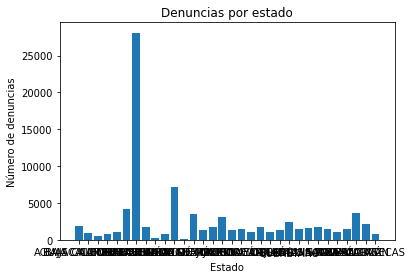

In [256]:
quejas_estado = df['ESTADO'].value_counts()
print(quejas_estado.head(10))

# agrupa las denuncias por entidad federativa
agrupado = df.groupby(['ESTADO']).count()
# obtiene el número de denuncias para cada entidad federativa
quejas = agrupado['TIPO_CONCILIACION'].tolist()

# crea un gráfico de barras
plt.bar(agrupado.index, quejas)
plt.xlabel('Estado')
plt.ylabel('Número de denuncias')
plt.title('Denuncias por estado')

# muestra el gráfico
plt.show()

2. Número de quejas por mes

Marzo         8038
Junio         7831
Mayo          7718
Agosto        7555
Julio         7021
Noviembre     6871
Octubre       6869
Abril         6820
Febrero       6714
Enero         6689
Septiembre    6680
Diciembre     3984
Name: FECHA_INGRESO, dtype: int64


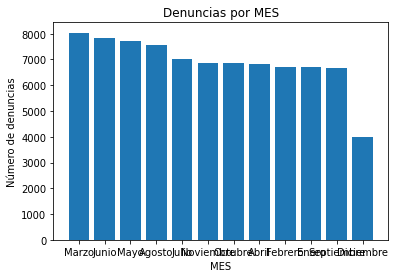

In [257]:
meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April':'Abril', 'May':'Mayo','June':'Junio', 
    'July':'Julio','August':'Agosto','September':'Septiembre','October':'Octubre','November':'Noviembre','December':'Diciembre'
}
quejas_mes = df['FECHA_INGRESO'].dt.strftime('%B').map(meses).value_counts()
print(quejas_mes.head(12))

# crea un gráfico de barras
plt.bar(quejas_mes.index, quejas_mes.tolist())
plt.xlabel('MES')
plt.ylabel('Número de denuncias')
plt.title('Denuncias por MES')
plt.show()



3. ¿Cuál es el sector más denunciado en promedio por entidad federativa?

In [258]:
sectores_denunciados_por_entidad = df.groupby(["ESTADO", "SECTOR"]).size().reset_index(name="denuncias")
df.groupby(["ESTADO", "SECTOR"]).size().reset_index(name="denuncias")
sectores_promedio_por_entidad = sectores_denunciados_por_entidad.groupby("ESTADO").mean().reset_index()
sectores_denunciados_por_entidad.groupby("ESTADO").mean().reset_index()
entidad_con_sector_promedio_mas_alto = sectores_promedio_por_entidad.loc[sectores_promedio_por_entidad["denuncias"].idxmax()]["ESTADO"]
sectores_promedio_por_entidad.loc[sectores_promedio_por_entidad["denuncias"].idxmax()]["ESTADO"]
sector_promedio_mas_alto_por_entidad = df[df["ESTADO"] == entidad_con_sector_promedio_mas_alto]["SECTOR"].value_counts().index[0]
df[df["ESTADO"] == entidad_con_sector_promedio_mas_alto]["SECTOR"].value_counts().index[0]
prom_alto=sectores_promedio_por_entidad.loc[sectores_promedio_por_entidad["ESTADO"] == entidad_con_sector_promedio_mas_alto]["denuncias"].values[0]
print(f"El sector más denunciado en promedio por entidad federativa es {sector_promedio_mas_alto_por_entidad} en la entidad {entidad_con_sector_promedio_mas_alto} con un promedio de {prom_alto} denuncias por sector.")



El sector más denunciado en promedio por entidad federativa es TURÍSTICO en la entidad CIUDAD DE MÉXICO con un promedio de 136.44660194174756 denuncias por sector.


4. ¿Cuál es el monto reclamado y recuperado por mes?

In [279]:
agrupado_monto = df.groupby(['MES_NUM']).sum()
agrupado_monto.rename(index={1: "Enero", 2: "Febrero", 3: "Marzo", 4:"Abril", 5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"}, inplace=True)
agrupado_monto[['MONTO_RECLAMADO','MONTO_RECUPERADO']]

,MONTO_RECLAMADO,MONTO_RECUPERADO
MES_NUM,,
Enero,52889798.08,49689316.22
Febrero,42011460.41,38600194.24
Marzo,60060063.39,54736182.87
Abril,42282252.48,46084089.83
Mayo,50340368.11,53248866.14
Junio,40894354.58,44760585.47
Julio,22072913.81,25172571.89
Agosto,17125434.81,19405924.26
Septiembre,2352127.88,3149237.51


5. Cantidad de quejas resueltas o en que estatus están

In [280]:
quejas_status = df['ESTADO_PROCESAL'].value_counts()
print(quejas_status)

En Trámite                       34937
Conciliada                       24811
Desistimiento                    15911
No Conciliada                     6695
Improcedente                       426
Turnada a Concil Medios Elec.        9
Turnada a Concil Person p/seg        1
Name: ESTADO_PROCESAL, dtype: int64
